# 1000 cameras dataset

First we will import necessary libraries and read in the dataset. After that, we will transform the dataset into a pandas dataframe so it is easier to work with. Then we check for zero values in the data and drop them. 

In [9]:
# import libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# read in dataset
camera = pd.read_csv("camera_dataset.csv")

# transform into  pandas dataframe
camera_df = pd.DataFrame(camera)

# check for null values and drop them as these only occur in 2 rows
camera_df.isnull().sum()
camera_drop_zero = camera_df.dropna(axis = 0, how = 'any')

#delete years 1994 and 1995 as there is not much data available
camera_new = camera_drop_zero.drop(camera_drop_zero.index[[0, 1]])

#check if any null values are left
#print(camera_new.isnull().sum())

#make dataframe that is sorted for date and price
camera_sorted = camera_new.sort_values(by = "Release date")
camera_sorted = camera_sorted.drop(camera_sorted.index[[0, 1]])

print(camera_sorted.shape)

#get a broad overview of the data
#print(camera_sorted.describe())


(1032, 13)
(1034, 13)


following this, we have a look on the shape of the dataset and the columns.

(1032, 13)
Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price'],
      dtype='object')


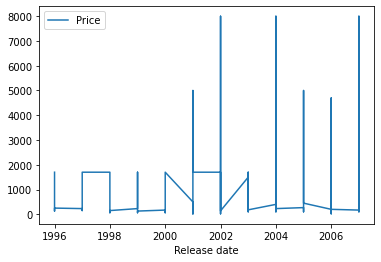

In [13]:
print(camera_sorted.shape)
print(camera_new.columns)


columns_without_price_date_model = []


for column in camera_new.columns :
        if column != "Release date" and column != "Price" and column != "Model":
            columns_without_price_date_model.append(column)

  
camera_sorted.plot(x = "Release date", y = "Price")
plt.show()

As the price ranges differs a lot and has no clear trend, we are going to look at the properties of different cameras and how they might relate to price. It seems that there are a few very expensive cameras, it would also be interesting to know how the median of camera price developed over time.

              Model  Max resolution  Low resolution  Effective pixels  \
Release date                                                            
1994              1               1               1                 1   
1995              1               1               1                 1   
1996              4               4               4                 4   
1997             10              10              10                10   
1998             31              31              31                31   
1999             53              53              53                53   
2000             61              61              61                61   
2001             85              85              85                85   
2002             89              89              89                89   
2003            101             101             101               101   
2004            141             141             141               141   
2005            143             143             143

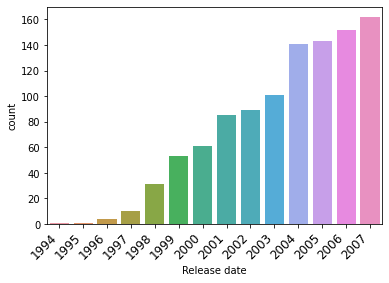

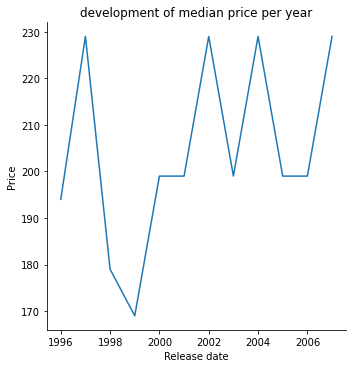

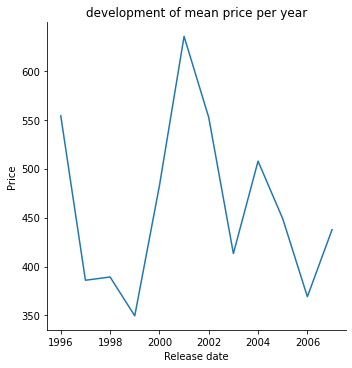

In [11]:
#print how many models per year the dataset has
print(camera_new.groupby("Release date").count())

#making barplot from number of cameras per year
countplot = sns.countplot(x = "Release date", data = camera_new)
countplot.set_xticklabels(countplot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')



#median and mean of price over time
mean_camera = camera_sorted.groupby("Release date").mean()

median_camera = camera_sorted.groupby("Release date").median()

sns.relplot(x = "Release date", y = "Price", data = median_camera, kind = "line")
plt.title("development of median price per year")

sns.relplot(x = "Release date", y = "Price", data = mean_camera, kind = "line")
plt.title("development of mean price per year")

plt.show()

In the countplot we can clearly see, that there are a lot more cameras in the dataset in the later years than in the earlier years. If that comes from the method of data collection or from the fact that there were less cameras released in the 1990's is not clear. Now we are going to look at the different camera properties and how they have developped over time.

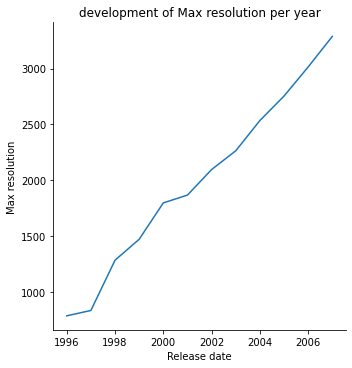

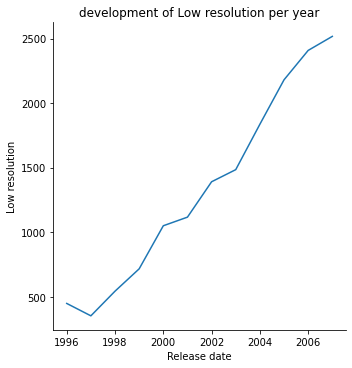

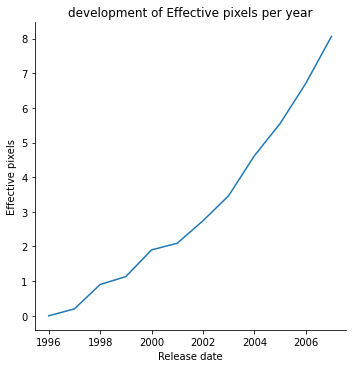

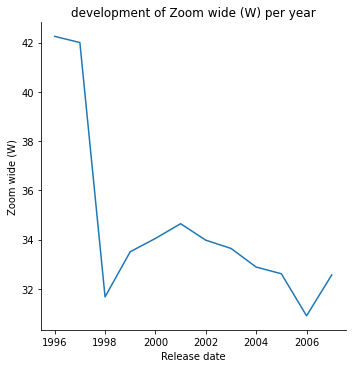

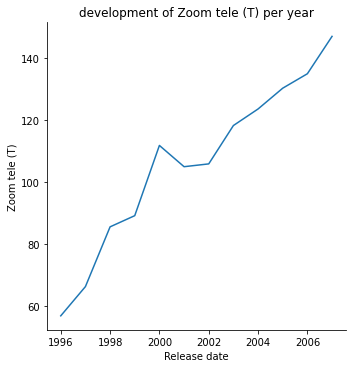

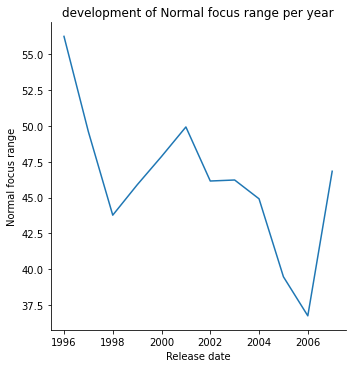

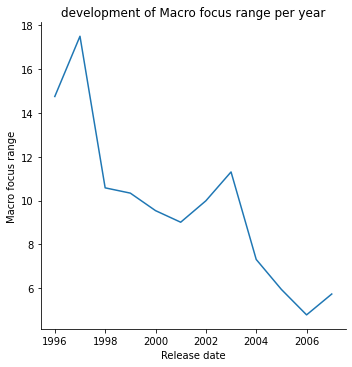

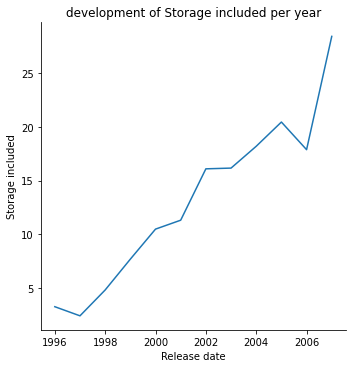

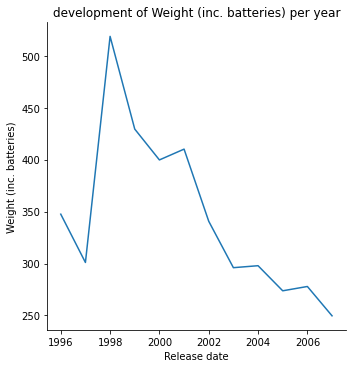

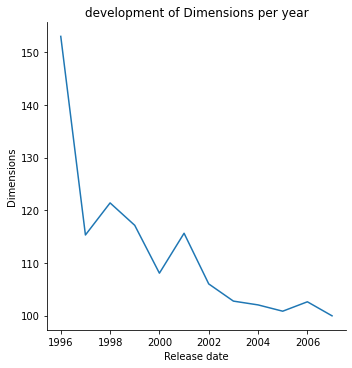

In [12]:
#different properties 

# sns.relplot(x = "Release date", y = "Effective pixels", data = mean_camera, kind = "line")
# plt.title("development of pixels per year")

for properties in columns_without_price_date_model :
    sns.relplot(x = "Release date", y = f"{properties}", data = mean_camera, kind = "line")
    plt.title(f"development of {properties} per year")
    plt.show
